<h2><span style="background: linear-gradient(to right, red, orange, yellow, green, blue, indigo, violet); -webkit-background-clip: text; color: transparent;">The5Outliers</span></h2>
<h3> Data preprocessing </h3>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.parse import unquote
from gensim.models import KeyedVectors

In [2]:
data_path = './data/paths-and-graph'
df_articles = pd.read_csv(os.path.join(data_path, 'articles.tsv'), skiprows=11, header=None).squeeze()
df_articles.rename('article_names')

0       %C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1                             %C3%85land
2                     %C3%89douard_Manet
3                              %C3%89ire
4             %C3%93engus_I_of_the_Picts
                      ...               
4599                             Zionism
4600                           Zirconium
4601                           Zoroaster
4602                        Zuid-Gelders
4603                                Zulu
Name: article_names, Length: 4604, dtype: object

In [19]:
df_articles = df_articles.apply(unquote)
df_articles = df_articles.replace('_', ' ', regex=True)
df_articles

0           Áedán mac Gabráin
1                       Åland
2               Édouard Manet
3                        Éire
4       Óengus I of the Picts
                ...          
4599                  Zionism
4600                Zirconium
4601                Zoroaster
4602             Zuid-Gelders
4603                     Zulu
Name: 0, Length: 4604, dtype: object

### Gensim word2vec: does not work because takes precise keys as input

In [ ]:
# Load pretrained model
word2vec = KeyedVectors.load_word2vec_format(r'./data/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
article_embeddings = np.zeros((len(df_articles), 3000))

for n in range(len(df_articles)):
    article_embeddings[n] = word2vec(df_articles[n])

0.7609457
0.76094574


### BGEM3 embedding: run in colab for speed (ou demander à Yaya pour les embeddings en .npy)

In [4]:
from FlagEmbedding import BGEM3FlagModel

In [5]:
%%capture
emb_model = BGEM3FlagModel('BAAI/bge-m3', use_fp16=True)

In [10]:
sentences = df_articles[:10].tolist()
embeddings = emb_model.encode(sentences)['dense_vecs']

similarity = embeddings[0] @ embeddings[1].T
print('similarity score: ', similarity)

similarity score:  0.3407456


In [12]:
type(embeddings)

numpy.ndarray

In [20]:
embeddings = np.load(os.path.join(data_path, 'embedded_articles.npy'))
similarity_matrix = np.matmul(embeddings, embeddings.T)

In [21]:
similarity_matrix.shape

(4604, 4604)

Text(0.5, 1.0, 'Cosine similarity of article names')

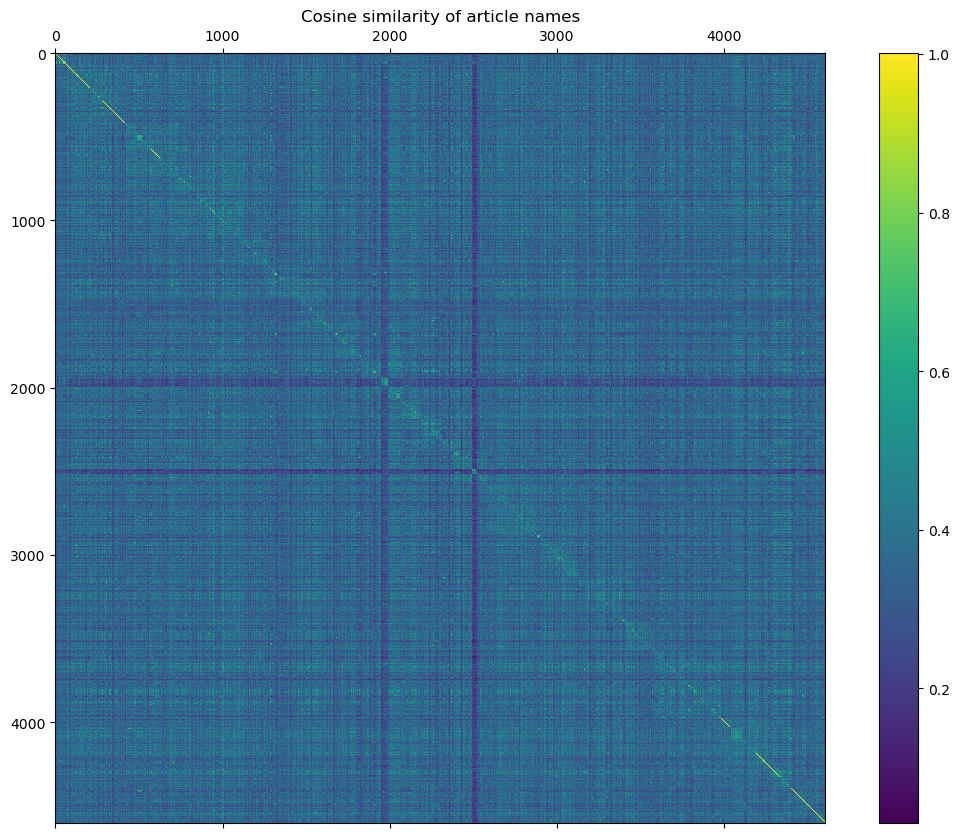

In [46]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(similarity_matrix)
cbar = fig.colorbar(cax)
plt.title('Cosine similarity of article names')

In [47]:
print(df_articles[df_articles == 'Édouard Manet'].index)
print(df_articles[df_articles == 'Dog'].index)
print(similarity_matrix[2, 1219])

Index([2], dtype='int64')
Index([1219], dtype='int64')
0.3215


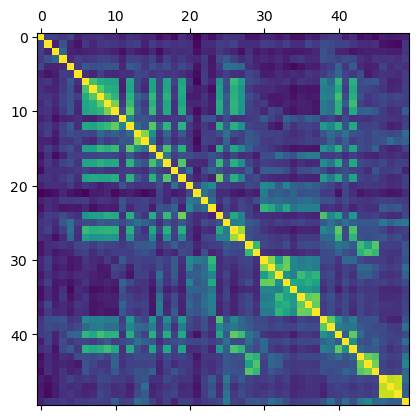

In [49]:
plt.matshow(similarity_matrix[:50, :50])